# Importing Libraries

In [1]:
import pandas as pd
from prophet import Prophet

# Exploratory Data Analysis

In [2]:
# Using pandas to read csv file
df = pd.read_csv('Electric_Production.csv')
df

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151
...,...,...
392,9/1/2017,98.6154
393,10/1/2017,93.6137
394,11/1/2017,97.3359
395,12/1/2017,114.7212


In [3]:
df.describe()

,IPG2211A2N
count,397.000000
mean,88.847218
std,15.387834
min,55.315100
25%,77.105200
50%,89.779500
75%,100.524400
max,129.404800


In [4]:
# checking for null values

df.isnull().any()

DATE          False
IPG2211A2N    False
dtype: bool

In [5]:
#checking for unique values

df['DATE'].unique()

array(['1/1/1985', '2/1/1985', '3/1/1985', '4/1/1985', '5/1/1985',
       '6/1/1985', '7/1/1985', '8/1/1985', '9/1/1985', '10/1/1985',
       '11/1/1985', '12/1/1985', '1/1/1986', '2/1/1986', '3/1/1986',
       '4/1/1986', '5/1/1986', '6/1/1986', '7/1/1986', '8/1/1986',
       '9/1/1986', '10/1/1986', '11/1/1986', '12/1/1986', '1/1/1987',
       '2/1/1987', '3/1/1987', '4/1/1987', '5/1/1987', '6/1/1987',
       '7/1/1987', '8/1/1987', '9/1/1987', '10/1/1987', '11/1/1987',
       '12/1/1987', '1/1/1988', '2/1/1988', '3/1/1988', '4/1/1988',
       '5/1/1988', '6/1/1988', '7/1/1988', '8/1/1988', '9/1/1988',
       '10/1/1988', '11/1/1988', '12/1/1988', '1/1/1989', '2/1/1989',
       '3/1/1989', '4/1/1989', '5/1/1989', '6/1/1989', '7/1/1989',
       '8/1/1989', '9/1/1989', '10/1/1989', '11/1/1989', '12/1/1989',
       '1/1/1990', '2/1/1990', '3/1/1990', '4/1/1990', '5/1/1990',
       '6/1/1990', '7/1/1990', '8/1/1990', '9/1/1990', '10/1/1990',
       '11/1/1990', '12/1/1990', '1/1/1991', '

In [6]:
df['IPG2211A2N'].unique()

array([ 72.5052,  70.672 ,  62.4502,  57.4714,  55.3151,  58.0904,
        62.6202,  63.2485,  60.5846,  56.3154,  58.0005,  68.7145,
        73.3057,  67.9869,  62.2221,  57.0329,  55.8137,  59.9005,
        65.7655,  64.4816,  61.0005,  57.5322,  59.3417,  68.1354,
        73.8152,  70.062 ,  65.61  ,  60.1586,  58.8734,  63.8918,
        68.8694,  70.0669,  64.1151,  60.3789,  62.4643,  70.5777,
        79.8703,  76.1622,  70.2928,  63.2384,  61.4065,  67.1097,
        72.9816,  75.7655,  67.5152,  63.2832,  65.1078,  73.8631,
        77.9188,  76.6822,  73.3523,  65.1081,  63.6892,  68.4722,
        74.0301,  75.0448,  69.3053,  65.8735,  69.0706,  84.1949,
        84.3598,  77.1726,  73.1964,  67.2781,  65.8218,  71.4654,
        76.614 ,  77.1052,  73.061 ,  67.4365,  68.5665,  77.6839,
        86.0214,  77.5573,  73.365 ,  67.15  ,  68.8162,  74.8448,
        80.0928,  79.1606,  73.5743,  68.7538,  72.5166,  79.4894,
        85.2855,  80.1643,  74.5275,  69.6441,  67.1784,  71.2

In [7]:
#Checking data type

df.dtypes

DATE           object
IPG2211A2N    float64
dtype: object

In [8]:
#Converting date from object to date-time

df['Date'] = pd.DatetimeIndex(df['DATE'])

In [9]:
df.head()

,DATE,IPG2211A2N,Date
0,1/1/1985,72.5052,1985-01-01
1,2/1/1985,70.6720,1985-02-01
2,3/1/1985,62.4502,1985-03-01
3,4/1/1985,57.4714,1985-04-01
4,5/1/1985,55.3151,1985-05-01


In [10]:
df.dtypes

DATE                  object
IPG2211A2N           float64
Date          datetime64[ns]
dtype: object

In [11]:
# dropping the "DATE" column

df.drop(['DATE'], axis=1, inplace=True)



#renaming the "IPG2211A2N" into y

df.columns = ['y', 'ds']

In [12]:
df.head()

,y,ds
0,72.5052,1985-01-01
1,70.6720,1985-02-01
2,62.4502,1985-03-01
3,57.4714,1985-04-01
4,55.3151,1985-05-01


In [14]:
df.tail()

,y,ds
392,98.6154,2017-09-01
393,93.6137,2017-10-01
394,97.3359,2017-11-01
395,114.7212,2017-12-01
396,129.4048,2018-01-01


# Train Model

In [13]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(df)

18:40:06 - cmdstanpy - INFO - Chain [1] start processing
18:40:06 - cmdstanpy - INFO - Chain [1] done processing


# Forecasting Electricity Production

In [19]:
# Using the model to forecast for another 200 months

future = m.make_future_dataframe(periods=200,freq='M')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1985-01-01,70.256454,68.769274,80.181454,70.256454,70.256454,4.219833,4.219833,4.219833,-8.790157,-8.790157,-8.790157,13.009991,13.009991,13.009991,0.0,0.0,0.0,74.476287
1,1985-02-01,70.436512,60.616356,71.780419,70.436512,70.436512,-4.187605,-4.187605,-4.187605,-8.790157,-8.790157,-8.790157,4.602552,4.602552,4.602552,0.0,0.0,0.0,66.248907
2,1985-03-01,70.599145,55.226393,66.699592,70.599145,70.599145,-9.726458,-9.726458,-9.726458,-8.790157,-8.790157,-8.790157,-0.936301,-0.936301,-0.936301,0.0,0.0,0.0,60.872686
3,1985-04-01,70.779202,46.858744,58.059457,70.779202,70.779202,-18.330680,-18.330680,-18.330680,-8.790157,-8.790157,-8.790157,-9.540523,-9.540523,-9.540523,0.0,0.0,0.0,52.448522
4,1985-05-01,70.953452,46.531715,58.236416,70.953452,70.953452,-18.104506,-18.104506,-18.104506,-8.790157,-8.790157,-8.790157,-9.314349,-9.314349,-9.314349,0.0,0.0,0.0,52.848945


In [21]:
# Comparing this with df.tail() above,
# there is significant increase in the date (ds)

forecast.tail(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
587,2033-11-30,117.075352,103.232158,120.150001,111.113494,124.325256,-5.910360,-5.910360,-5.910360,-8.790157,-8.790157,-8.790157,2.879797,2.879797,2.879797,0.0,0.0,0.0,111.164992
588,2033-12-31,117.099122,113.013501,131.298846,111.084090,124.411788,4.919819,4.919819,4.919819,-8.790157,-8.790157,-8.790157,13.709976,13.709976,13.709976,0.0,0.0,0.0,122.018941
589,2034-01-31,117.122892,108.032651,124.880200,111.051156,124.491300,-1.032796,-1.032796,-1.032796,-8.790157,-8.790157,-8.790157,7.757362,7.757362,7.757362,0.0,0.0,0.0,116.090096
590,2034-02-28,117.144362,100.926097,118.371522,111.017944,124.567760,-8.268778,-8.268778,-8.268778,-8.790157,-8.790157,-8.790157,0.521380,0.521380,0.521380,0.0,0.0,0.0,108.875584
591,2034-03-31,117.168132,88.976422,106.680547,111.000694,124.646542,-19.658468,-19.658468,-19.658468,-8.790157,-8.790157,-8.790157,-10.868310,-10.868310,-10.868310,0.0,0.0,0.0,97.509664
592,2034-04-30,117.191135,88.455423,105.987392,110.987780,124.724580,-19.902174,-19.902174,-19.902174,-8.790157,-8.790157,-8.790157,-11.112016,-11.112016,-11.112016,0.0,0.0,0.0,97.288961
593,2034-05-31,117.214905,96.587733,114.955716,110.970038,124.803385,-11.610173,-11.610173,-11.610173,-8.790157,-8.790157,-8.790157,-2.820016,-2.820016,-2.820016,0.0,0.0,0.0,105.604731
594,2034-06-30,117.237908,106.154155,124.196565,110.905584,124.881423,-2.631209,-2.631209,-2.631209,-8.790157,-8.790157,-8.790157,6.158948,6.158948,6.158948,0.0,0.0,0.0,114.606699
595,2034-07-31,117.261678,107.701830,125.603775,110.863943,124.960228,-0.819810,-0.819810,-0.819810,-8.790157,-8.790157,-8.790157,7.970348,7.970348,7.970348,0.0,0.0,0.0,116.441868
596,2034-08-31,117.285448,97.704074,115.506654,110.838438,125.039033,-10.782169,-10.782169,-10.782169,-8.790157,-8.790157,-8.790157,-1.992011,-1.992011,-1.992011,0.0,0.0,0.0,106.503279


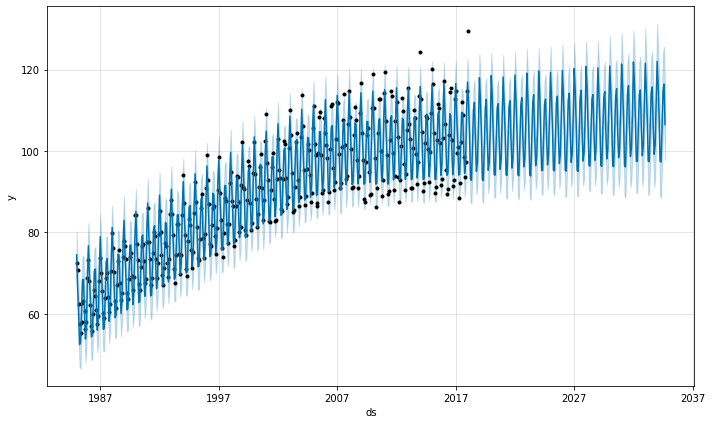

In [28]:
# vizualizing the forecast prediction

plot1 = m.plot(forecast)

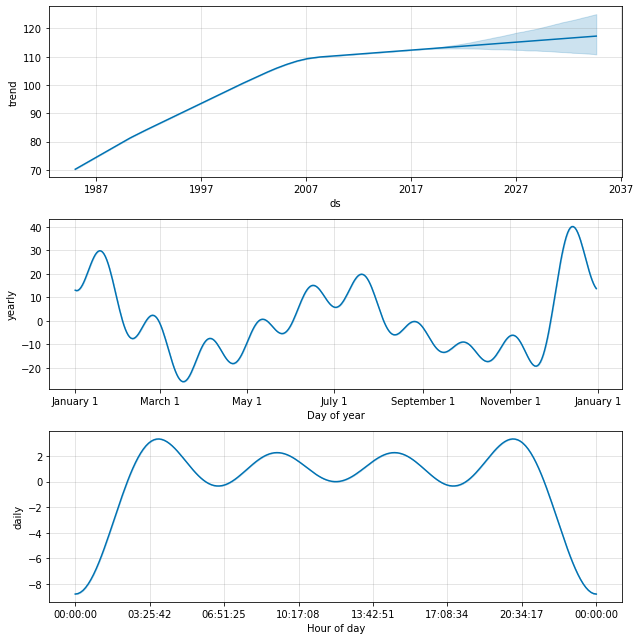

In [29]:
# Decomposing the trends in the prediction, including yearly and daily forecasts

plt2 = m.plot_components(forecast)